# CNN with Keras

In [39]:
from keras.datasets import mnist

In [40]:
import matplotlib.pyplot as plt

In [41]:
## load the dataset
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [42]:
X_train.shape

(60000, 28, 28)

In [43]:
X_train.shape[0]

60000

In [44]:
y_train.shape

(60000,)

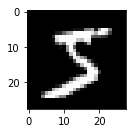

In [45]:
## plot fewimages 
plt.subplot(221)
plt.imshow(X_train[0],cmap=plt.get_cmap('gray'))

plt.show()

In [46]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten

from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.utils import np_utils
from keras import backend as k
k.set_image_dim_ordering('th')

# Reshape the data to [samples][pixels][width][height]

Each image is 28 pixels  and we use 1 because they are black and white. 

In [47]:
X_train = X_train.reshape(X_train.shape[0],1,28,28).astype('float')
X_test = X_test.reshape(X_test.shape[0],1,28,28).astype('float')

# Normalize the data

In [48]:
X_train = X_train/255
X_test = X_test/255
### one hot encode the outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
num_classes

10

In [49]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5,5) , input_shape=(1,28,28) , activation='relu'))   ###  conv layer that has 32 neurons
    model.add(MaxPooling2D(pool_size=(2,2)))  ### we are using the 2*2 so that is for the minimum 
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    ### comple the model
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model

In [50]:
model = baseline_model()

model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=200,verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)

print("CNN ERROR: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 140s - loss: 0.2464 - acc: 0.9288 - val_loss: 0.0804 - val_acc: 0.9757
Epoch 2/10
 - 139s - loss: 0.0750 - acc: 0.9775 - val_loss: 0.0533 - val_acc: 0.9840
Epoch 3/10
 - 139s - loss: 0.0537 - acc: 0.9840 - val_loss: 0.0479 - val_acc: 0.9830
Epoch 4/10
 - 139s - loss: 0.0429 - acc: 0.9865 - val_loss: 0.0379 - val_acc: 0.9877
Epoch 5/10
 - 138s - loss: 0.0350 - acc: 0.9889 - val_loss: 0.0346 - val_acc: 0.9878
Epoch 6/10
 - 139s - loss: 0.0296 - acc: 0.9908 - val_loss: 0.0338 - val_acc: 0.9892
Epoch 7/10
 - 139s - loss: 0.0256 - acc: 0.9918 - val_loss: 0.0355 - val_acc: 0.9887
Epoch 8/10
 - 139s - loss: 0.0205 - acc: 0.9936 - val_loss: 0.0305 - val_acc: 0.9895
Epoch 9/10
 - 138s - loss: 0.0175 - acc: 0.9945 - val_loss: 0.0316 - val_acc: 0.9893
Epoch 10/10
 - 138s - loss: 0.0156 - acc: 0.9947 - val_loss: 0.0345 - val_acc: 0.9893
CNN ERROR: 1.07%
